In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/int303-big-data-analysis-2223-S1/sample_submission.csv
/kaggle/input/int303-big-data-analysis-2223-S1/train.csv
/kaggle/input/int303-big-data-analysis-2223-S1/test.csv


In [3]:
testData = pd.read_csv('/kaggle/input/int303-big-data-analysis-2223-S1/test.csv')
trainData = pd.read_csv('/kaggle/input/int303-big-data-analysis-2223-S1/train.csv')

In [3]:
pd.set_option('display.max_columns', 1000)
trainData

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,32,No,Travel_Frequently,116,Research & Development,13,3,Other,1,881,3,Female,77,2,1,Laboratory Technician,2,Married,2743,7331,1,Y,No,20,4,3,80,1,2,2,3,2,2,2,2
1,53,No,Travel_Rarely,1436,Sales,6,2,Marketing,1,153,2,Male,34,3,2,Sales Representative,3,Married,2306,16047,2,Y,Yes,20,4,4,80,1,13,3,1,7,7,4,5
2,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,1467,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
3,34,No,Travel_Rarely,971,Sales,1,3,Technical Degree,1,1085,4,Male,64,2,3,Sales Executive,3,Married,7083,12288,1,Y,Yes,14,3,4,80,0,10,3,3,10,9,8,6
4,50,No,Travel_Frequently,333,Research & Development,22,5,Medical,1,1087,3,Male,88,1,4,Research Director,4,Single,14411,24450,1,Y,Yes,13,3,4,80,0,32,2,3,32,6,13,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1098,34,No,Travel_Rarely,511,Sales,3,2,Life Sciences,1,1271,4,Female,32,1,2,Sales Executive,4,Single,6029,25353,5,Y,No,12,3,1,80,0,6,3,3,2,2,2,2
1099,46,No,Travel_Rarely,1277,Sales,2,3,Life Sciences,1,1236,3,Male,74,3,3,Sales Executive,4,Divorced,10368,5596,4,Y,Yes,12,3,2,80,1,13,5,2,10,6,0,3
1100,32,No,Travel_Rarely,529,Research & Development,2,3,Technical Degree,1,1450,4,Male,78,3,1,Research Scientist,1,Single,2439,11288,1,Y,No,14,3,4,80,0,4,4,3,4,2,1,2
1101,39,No,Non-Travel,105,Research & Development,9,3,Life Sciences,1,1438,4,Male,87,3,5,Manager,4,Single,19431,15302,2,Y,No,13,3,3,80,0,21,3,2,6,0,1,3


In [4]:
# View Shape
print(trainData.shape)
# Judge that the return value (type of the duplicate value is Boolean)
print(trainData.duplicated())
print(trainData.duplicated().sum())
# Display the number of missing values in each column
print(trainData.isnull().sum())
# Display the number of duplicate values in each column
print(trainData.duplicated('Over18').sum())
print(trainData.duplicated('EmployeeNumber').sum())
print(trainData.duplicated('StandardHours').sum())

(1103, 35)
0       False
1       False
2       False
3       False
4       False
        ...  
1098    False
1099    False
1100    False
1101    False
1102    False
Length: 1103, dtype: bool
0
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours              

In [5]:
explore = trainData.describe().T
explore

,count,mean,std,min,25%,50%,75%,max
Age,1103.0,36.697189,9.075448,18.0,30.0,35.0,43.0,60.0
DailyRate,1103.0,810.515866,405.943336,103.0,467.5,805.0,1169.0,1499.0
DistanceFromHome,1103.0,9.296464,8.150026,1.0,2.0,7.0,14.0,29.0
Education,1103.0,2.943790,1.012855,1.0,2.0,3.0,4.0,5.0
EmployeeCount,1103.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
EmployeeNumber,1103.0,742.293744,426.965196,2.0,369.5,740.0,1116.5,1470.0
EnvironmentSatisfaction,1103.0,2.731641,1.081341,1.0,2.0,3.0,4.0,4.0
HourlyRate,1103.0,65.805984,20.186842,30.0,48.0,66.0,83.0,100.0
JobInvolvement,1103.0,2.733454,0.710075,1.0,2.0,3.0,3.0,4.0
JobLevel,1103.0,2.075249,1.117731,1.0,1.0,2.0,3.0,5.0


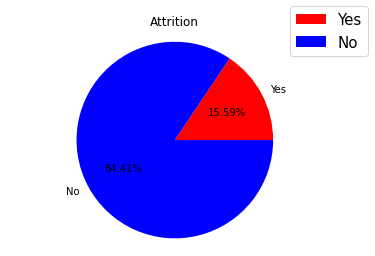

Leave： 172
Active： 931


In [6]:
# Active  Leave

from matplotlib import pyplot as plt

plt.title('Attrition')
labels = ['Yes','No'] 
accounts = [trainData['Attrition'].value_counts()['Yes'], trainData['Attrition'].value_counts()['No']] 
colors = ['r','blue'] 
plt.pie(accounts,labels=labels,colors=colors,autopct = '%3.2f%%') 
plt.legend(loc="upper right",fontsize=15,bbox_to_anchor=(1.1,1.15))
plt.axis('equal')
plt.show()


print('Leave：',trainData['Attrition'].value_counts()['Yes'])
print('Active：',trainData['Attrition'].value_counts()['No'])
# 172 resignations, accounting for 15.59%; 931 employees, accounting for 84.41%


In [6]:
non_numeric_df = trainData.select_dtypes(exclude=['number'])
non_numeric_df

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,No,Travel_Frequently,Research & Development,Other,Female,Laboratory Technician,Married,Y,No
1,No,Travel_Rarely,Sales,Marketing,Male,Sales Representative,Married,Y,Yes
2,No,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married,Y,No
3,No,Travel_Rarely,Sales,Technical Degree,Male,Sales Executive,Married,Y,Yes
4,No,Travel_Frequently,Research & Development,Medical,Male,Research Director,Single,Y,Yes
...,...,...,...,...,...,...,...,...,...
1098,No,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,No
1099,No,Travel_Rarely,Sales,Life Sciences,Male,Sales Executive,Divorced,Y,Yes
1100,No,Travel_Rarely,Research & Development,Technical Degree,Male,Research Scientist,Single,Y,No
1101,No,Non-Travel,Research & Development,Life Sciences,Male,Manager,Single,Y,No


In [7]:
print(trainData['BusinessTravel'].unique()) 
print(trainData['Department'].unique()) 
print(trainData['EducationField'].unique()) 
print(trainData['Gender'].unique()) 
print(trainData['JobRole'].unique()) 
print(trainData['MaritalStatus'].unique()) 
print(trainData['OverTime'].unique()) 

['Travel_Frequently' 'Travel_Rarely' 'Non-Travel']
['Research & Development' 'Sales' 'Human Resources']
['Other' 'Marketing' 'Medical' 'Technical Degree' 'Life Sciences'
 'Human Resources']
['Female' 'Male']
['Laboratory Technician' 'Sales Representative'
 'Healthcare Representative' 'Sales Executive' 'Research Director'
 'Manager' 'Human Resources' 'Manufacturing Director' 'Research Scientist']
['Married' 'Single' 'Divorced']
['No' 'Yes']


In [8]:
# Delete obviously irrelevant features
trainData.drop(['EmployeeCount','Over18','EmployeeNumber','StandardHours'],axis=1,inplace=True)

# Convert category features into ordered category numerical features
trainData.groupby(by='BusinessTravel').size()
BT=[]
for i in trainData.BusinessTravel:
    if i=='Non-Travel':
        BT.append(1)
    elif i=='Travel_Rarely':
        BT.append(2)
    elif i=='Travel_Frequently':
        BT.append(3)
        
trainData.groupby(by='Attrition').size()
target_lst = []
for i in trainData.Attrition:
    if i=='No':
        target_lst.append(1)
    elif i=='Yes':
        target_lst.append(0)


trainData.loc[:,'Attrition'] = target_lst
trainData.loc[:,'BusinessTravel'] = BT
trainData

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,32,1,3,116,Research & Development,13,3,Other,3,Female,...,4,3,1,2,2,3,2,2,2,2
1,53,1,2,1436,Sales,6,2,Marketing,2,Male,...,4,4,1,13,3,1,7,7,4,5
2,39,1,2,613,Research & Development,6,1,Medical,4,Male,...,3,1,1,9,5,3,7,7,1,7
3,34,1,2,971,Sales,1,3,Technical Degree,4,Male,...,3,4,0,10,3,3,10,9,8,6
4,50,1,3,333,Research & Development,22,5,Medical,3,Male,...,3,4,0,32,2,3,32,6,13,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1098,34,1,2,511,Sales,3,2,Life Sciences,4,Female,...,3,1,0,6,3,3,2,2,2,2
1099,46,1,2,1277,Sales,2,3,Life Sciences,3,Male,...,3,2,1,13,5,2,10,6,0,3
1100,32,1,2,529,Research & Development,2,3,Technical Degree,4,Male,...,3,4,0,4,4,3,4,2,1,2
1101,39,1,1,105,Research & Development,9,3,Life Sciences,4,Male,...,3,3,0,21,3,2,6,0,1,3


In [9]:
# Delete obviously irrelevant features
testData.drop(['EmployeeCount','Over18','StandardHours'],axis=1,inplace=True)

# Convert category features into ordered category numerical features
testData.groupby(by='BusinessTravel').size()
test_BT=[]
for i in testData.BusinessTravel:
    if i=='Non-Travel':
        test_BT.append(1)
    elif i=='Travel_Rarely':
        test_BT.append(2)
    elif i=='Travel_Frequently':
        test_BT.append(3)
        

testData.loc[:,'BusinessTravel'] = test_BT



In [10]:
from sklearn import preprocessing
## 无序类别
nonorder_cols=['Department','EducationField','JobRole','Gender','MaritalStatus','OverTime']
target_col = ['Attrition']

In [12]:
trainData_one_hot=pd.get_dummies(trainData[nonorder_cols])
trainData_one_hot.shape
trainData_num = trainData.drop(columns=nonorder_cols)
trainData_new=pd.concat([trainData_num,trainData_one_hot],axis=1)
trainData_new.head()


,Age,Attrition,BusinessTravel,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,Gender_Female,Gender_Male,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,32,1,3,116,13,3,3,77,2,1,...,0,0,0,1,0,0,1,0,1,0
1,53,1,2,1436,6,2,2,34,3,2,...,0,0,1,0,1,0,1,0,0,1
2,39,1,2,613,6,1,4,42,2,3,...,0,0,0,0,1,0,1,0,1,0
3,34,1,2,971,1,3,4,64,2,3,...,0,1,0,0,1,0,1,0,0,1
4,50,1,3,333,22,5,3,88,1,4,...,0,0,0,0,1,0,0,1,0,1


In [11]:
testData_one_hot=pd.get_dummies(testData[nonorder_cols])
testData_one_hot.shape
testData_num = testData.drop(columns=nonorder_cols)
testData_new=pd.concat([testData_num,testData_one_hot],axis=1)
testData_new.head()


,Age,Attrition,BusinessTravel,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,Gender_Female,Gender_Male,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,41,NaN,2,1102,1,2,1,2,94,3,...,0,1,0,1,0,0,0,1,0,1
1,37,NaN,2,1373,2,2,3,4,92,2,...,0,0,0,0,1,0,0,1,0,1
2,29,NaN,2,153,15,2,12,4,49,2,...,0,0,0,1,0,0,0,1,0,1
3,34,NaN,2,1346,19,2,14,2,93,3,...,0,0,0,0,1,1,0,0,1,0
4,22,NaN,1,1123,16,2,18,4,96,4,...,0,0,0,0,1,1,0,0,0,1


In [13]:
##分割训练、测试集
from sklearn.model_selection import train_test_split
fea = trainData_new.drop(['Attrition'], axis=1)
target = trainData_new['Attrition']
fea_train, fea_Validation, target_train, target_Validation = train_test_split(fea, target, test_size=0.2, random_state=1) 
# random_state=0 表示每次分割后结果都不一样

In [14]:
#Process unbalanced data, and put back the sampled data for many times until the positive and negative samples are close

from imblearn.over_sampling import SMOTE

print('重采样前：')
print('Positive：',len(target_train[target_train==0]))
print('Negative：',len(target_train[target_train==1]))

sm=SMOTE(random_state=0)
re_fea_train,re_target_train=sm.fit_resample(fea_train.values,target_train.values)

print('重采样后：')
print('Positive：',len(re_target_train[re_target_train==0]))
print('Negative：',len(re_target_train[re_target_train==1]))


重采样前：
Positive： 132
Negative： 750
重采样后：
Positive： 750
Negative： 750


In [ ]:
# PCA has poor effect after dimension reduction, so it is no longer used
'''
from sklearn.decomposition import PCA 
pca=PCA(n_components= 49) 
pca_fea_train=pca.fit_transform(re_fea_train) 
print(pca_fea_train.shape)

pca_fea_Validation=pca.fit_transform(fea_Validation)
print(pca_fea_Validation.shape)
print(fea_Validation.shape)
'''

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

rf = RandomForestClassifier(random_state=0,n_estimators=18,max_features = 14) 
print(rf.fit(re_fea_train,re_target_train))
print('训练集准确率:',rf.score(re_fea_train,re_target_train))


RandomForestClassifier(max_features=14, n_estimators=18, random_state=0)
训练集准确率: 0.9986666666666667


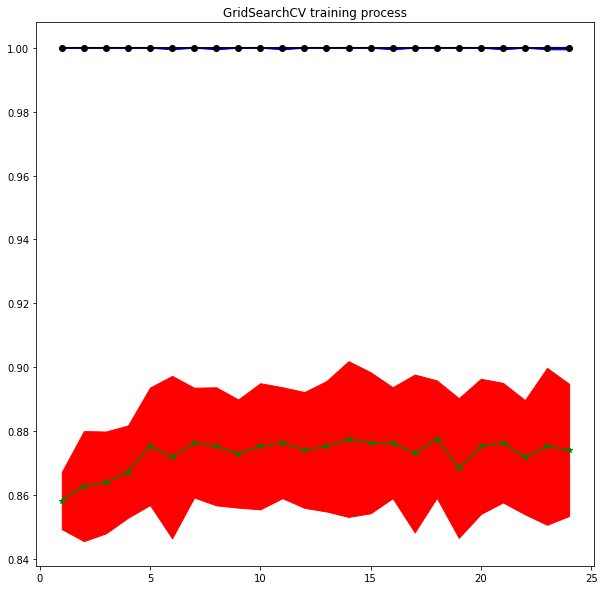

In [24]:
# Find the optimal parameters ： n_estimators
from sklearn.model_selection import GridSearchCV

n_estimators = np.arange(1,25)
param = {'n_estimators': n_estimators}

max_features = np.arange(1,25)
param_2 = {'max_features': max_features}

clf = GridSearchCV(RandomForestClassifier(), param_grid=param_2 ,return_train_score=True, cv=10)
clf.fit(fea_train, target_train)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)

ax.fill_between(max_features,clf.cv_results_['mean_train_score']+clf.cv_results_['std_train_score'],
                 clf.cv_results_['mean_train_score']-clf.cv_results_['std_train_score'],color='b')
ax.fill_between(max_features,clf.cv_results_['mean_test_score']+clf.cv_results_['std_test_score'],
                 clf.cv_results_['mean_test_score']-clf.cv_results_['std_test_score'],color='r')

ax.plot(max_features,clf.cv_results_['mean_train_score'],'ko-')
ax.plot(max_features,clf.cv_results_['mean_test_score'],'g*-')

plt.title('GridSearchCV training process')
plt.show()

In [30]:
##输出矩阵报告
from sklearn.metrics import classification_report


train_pred = rf.predict(re_fea_train)
Validation_pred = rf.predict(fea_Validation)

print('Training set:')
print(classification_report(re_target_train, train_pred))
print('Validation set:')
print(classification_report(target_Validation, Validation_pred))

Training set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       750
           1       1.00      1.00      1.00       750

    accuracy                           1.00      1500
   macro avg       1.00      1.00      1.00      1500
weighted avg       1.00      1.00      1.00      1500

Validation set:
              precision    recall  f1-score   support

           0       0.48      0.35      0.41        40
           1       0.86      0.92      0.89       181

    accuracy                           0.81       221
   macro avg       0.67      0.63      0.65       221
weighted avg       0.80      0.81      0.80       221



/opt/conda/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


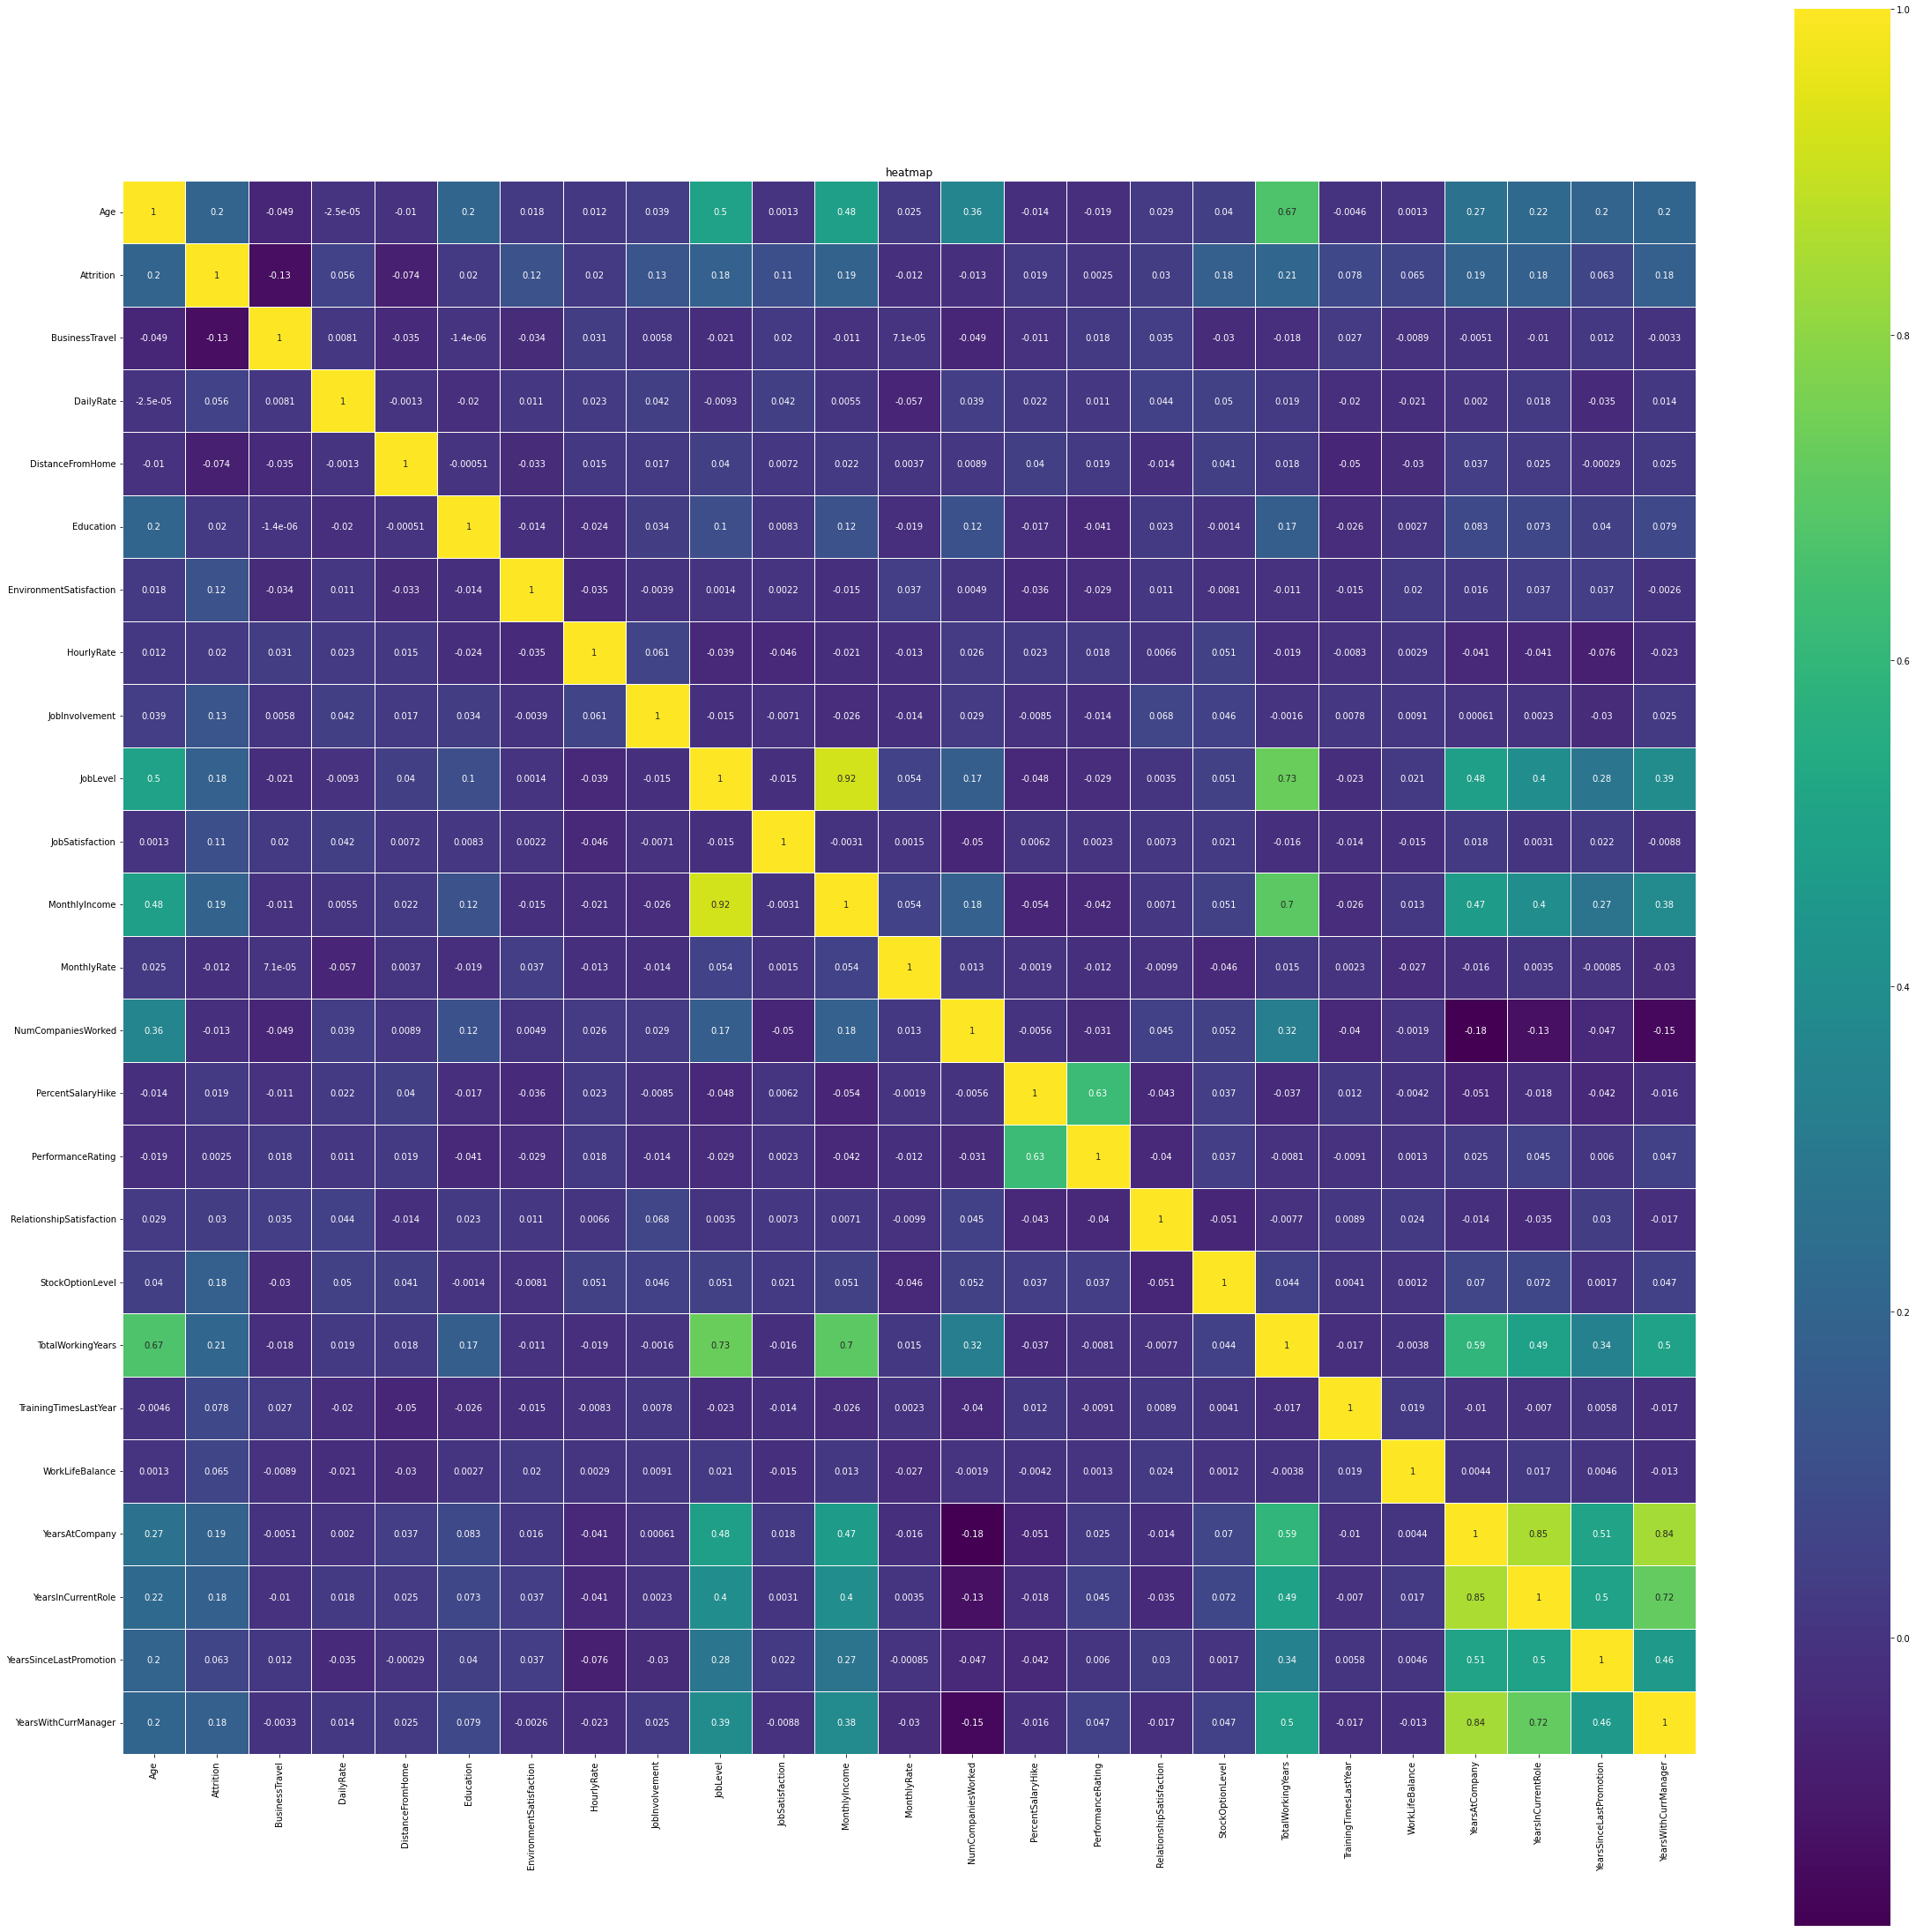

In [31]:
# heatmap
import seaborn as sns

corr=trainData.corr(method='spearman')
fig=plt.figure(figsize=(40,40))
sns.heatmap(corr,vmax=1,linewidths=0.5,
           square=True,annot=True,cmap='viridis',linecolor='white')
plt.title('heatmap')
plt.show()

In [27]:
submission = testData_new.drop(['Attrition','EmployeeNumber'], axis=1).copy()
submission

,Age,BusinessTravel,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,Gender_Female,Gender_Male,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,41,2,1102,1,2,2,94,3,2,4,...,0,1,0,1,0,0,0,1,0,1
1,37,2,1373,2,2,4,92,2,1,3,...,0,0,0,0,1,0,0,1,0,1
2,29,2,153,15,2,4,49,2,2,3,...,0,0,0,1,0,0,0,1,0,1
3,34,2,1346,19,2,2,93,3,1,4,...,0,0,0,0,1,1,0,0,1,0
4,22,1,1123,16,2,4,96,4,1,4,...,0,0,0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,21,2,501,5,1,3,58,3,1,1,...,0,0,1,0,1,0,0,1,0,1
363,36,2,557,3,3,1,94,2,3,4,...,0,1,0,1,0,0,1,0,1,0
364,36,3,688,4,2,4,97,3,2,2,...,0,0,0,1,0,1,0,0,1,0
365,35,2,287,1,4,3,62,1,1,4,...,1,0,0,1,0,0,1,0,1,0


In [33]:
import numpy as np
submission_test_pred = rf.predict(submission)
submission_test_pred

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


array([1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,

In [34]:
id_col = testData['EmployeeNumber']
submission_df_1 = pd.DataFrame({
                  "EmployeeNumber": id_col, 
                  "Attrition": submission_test_pred})
submission_df_1.head()

,EmployeeNumber,Attrition
0,1,1
1,3,0
2,12,1
3,14,1
4,18,0


In [35]:
submission_df_1.groupby(by='Attrition').size()

submission_target_lst = []
for i in submission_df_1.Attrition:
    if i==1:
        submission_target_lst.append('No')
    elif i==0:
        submission_target_lst.append('Yes')


submission_df_1.loc[:,'Attrition'] = submission_target_lst

submission_df_1

,EmployeeNumber,Attrition
0,1,No
1,3,Yes
2,12,No
3,14,No
4,18,Yes
...,...,...
362,1437,Yes
363,1440,No
364,1441,No
365,1459,No


In [36]:
submission_df_1.to_csv('submission.csv', index=False)

# Delete some unimportant feature columns 

In [35]:
corr_Attrition=trainData.corr(method='spearman')["Attrition"]
corr_Attrition_df = pd.DataFrame(corr_Attrition).abs().nsmallest(4,"Attrition")["Attrition"]
corr_Attrition_df

PerformanceRating     0.002453
MonthlyRate           0.012016
NumCompaniesWorked    0.012878
PercentSalaryHike     0.019459
Name: Attrition, dtype: float64

In [36]:
trainData

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,32,1,3,116,Research & Development,13,3,Other,3,Female,...,4,3,1,2,2,3,2,2,2,2
1,53,1,2,1436,Sales,6,2,Marketing,2,Male,...,4,4,1,13,3,1,7,7,4,5
2,39,1,2,613,Research & Development,6,1,Medical,4,Male,...,3,1,1,9,5,3,7,7,1,7
3,34,1,2,971,Sales,1,3,Technical Degree,4,Male,...,3,4,0,10,3,3,10,9,8,6
4,50,1,3,333,Research & Development,22,5,Medical,3,Male,...,3,4,0,32,2,3,32,6,13,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1098,34,1,2,511,Sales,3,2,Life Sciences,4,Female,...,3,1,0,6,3,3,2,2,2,2
1099,46,1,2,1277,Sales,2,3,Life Sciences,3,Male,...,3,2,1,13,5,2,10,6,0,3
1100,32,1,2,529,Research & Development,2,3,Technical Degree,4,Male,...,3,4,0,4,4,3,4,2,1,2
1101,39,1,1,105,Research & Development,9,3,Life Sciences,4,Male,...,3,3,0,21,3,2,6,0,1,3


In [37]:
cln_trainData = trainData.drop(corr_Attrition_df.index.tolist(), axis=1,inplace = False).copy()
cln_trainData

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,OverTime,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,32,1,3,116,Research & Development,13,3,Other,3,Female,...,No,3,1,2,2,3,2,2,2,2
1,53,1,2,1436,Sales,6,2,Marketing,2,Male,...,Yes,4,1,13,3,1,7,7,4,5
2,39,1,2,613,Research & Development,6,1,Medical,4,Male,...,No,1,1,9,5,3,7,7,1,7
3,34,1,2,971,Sales,1,3,Technical Degree,4,Male,...,Yes,4,0,10,3,3,10,9,8,6
4,50,1,3,333,Research & Development,22,5,Medical,3,Male,...,Yes,4,0,32,2,3,32,6,13,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1098,34,1,2,511,Sales,3,2,Life Sciences,4,Female,...,No,1,0,6,3,3,2,2,2,2
1099,46,1,2,1277,Sales,2,3,Life Sciences,3,Male,...,Yes,2,1,13,5,2,10,6,0,3
1100,32,1,2,529,Research & Development,2,3,Technical Degree,4,Male,...,No,4,0,4,4,3,4,2,1,2
1101,39,1,1,105,Research & Development,9,3,Life Sciences,4,Male,...,No,3,0,21,3,2,6,0,1,3


In [38]:
cln_trainData_one_hot=pd.get_dummies(cln_trainData[nonorder_cols])
cln_trainData_one_hot.shape
cln_trainData_num = cln_trainData.drop(columns=nonorder_cols)
cln_trainData_new=pd.concat([cln_trainData_num,cln_trainData_one_hot],axis=1)
cln_trainData_new.head()


,Age,Attrition,BusinessTravel,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,Gender_Female,Gender_Male,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,32,1,3,116,13,3,3,77,2,1,...,0,0,0,1,0,0,1,0,1,0
1,53,1,2,1436,6,2,2,34,3,2,...,0,0,1,0,1,0,1,0,0,1
2,39,1,2,613,6,1,4,42,2,3,...,0,0,0,0,1,0,1,0,1,0
3,34,1,2,971,1,3,4,64,2,3,...,0,1,0,0,1,0,1,0,0,1
4,50,1,3,333,22,5,3,88,1,4,...,0,0,0,0,1,0,0,1,0,1


In [39]:
##分割训练、测试集

cln_fea = cln_trainData_new.drop(['Attrition'], axis=1)
cln_target = cln_trainData_new['Attrition']
cln_fea_train, cln_fea_Validation, cln_target_train, cln_target_Validation = train_test_split(cln_fea, cln_target, test_size=0.2, random_state=1) 



In [43]:
from sklearn.ensemble import RandomForestClassifier
sm=SMOTE(random_state=0)
cln_re_fea_train,cln_re_target_train=sm.fit_resample(cln_fea_train.values,cln_target_train.values)

new_rf = RandomForestClassifier(random_state=0,max_features=8,n_estimators=21,max_depth = 18, min_samples_split = 2) 
print(new_rf.fit(cln_re_fea_train,cln_re_target_train))
print('训练集准确率:',new_rf.score(cln_re_fea_train,cln_re_target_train))

RandomForestClassifier(max_depth=18, max_features=8, n_estimators=21,
                       random_state=0)
训练集准确率: 0.9986666666666667


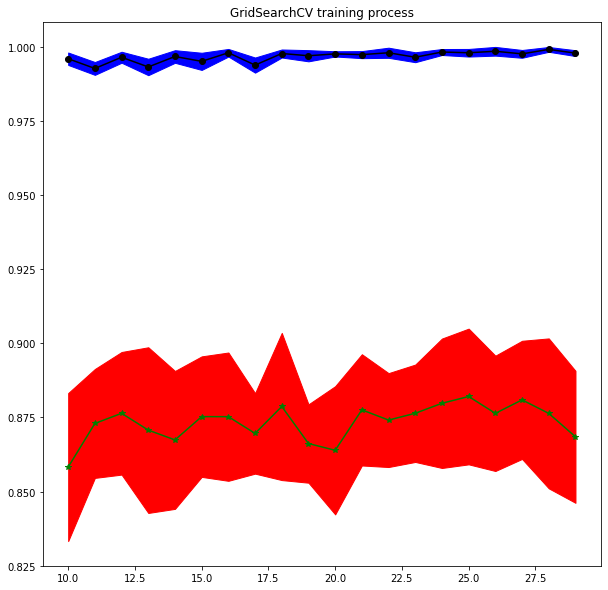

In [109]:
# Find the optimal parameters ： n_estimators
from sklearn.model_selection import GridSearchCV

n_estimators = np.arange(10,30)
param = {'n_estimators': n_estimators}

max_features = np.arange(1,20)
param_2 = {"max_features":max_features}

max_depth= np.arange(1,20)
param_3 = {"max_depth":max_depth}


min_samples_split =   np.arange(1,20)
param_4 = {"min_samples_split":min_samples_split}

clf = GridSearchCV(RandomForestClassifier(), param_grid=param ,return_train_score=True, cv=10)
clf.fit(cln_fea_train, cln_target_train)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)

ax.fill_between(n_estimators,clf.cv_results_['mean_train_score']+clf.cv_results_['std_train_score'],
                 clf.cv_results_['mean_train_score']-clf.cv_results_['std_train_score'],color='b')
ax.fill_between(n_estimators,clf.cv_results_['mean_test_score']+clf.cv_results_['std_test_score'],
                 clf.cv_results_['mean_test_score']-clf.cv_results_['std_test_score'],color='r')

ax.plot(n_estimators,clf.cv_results_['mean_train_score'],'ko-')
ax.plot(n_estimators,clf.cv_results_['mean_test_score'],'g*-')

plt.title('GridSearchCV training process')
plt.show()

In [44]:
cln_train_pred = new_rf.predict(cln_re_fea_train)
cln_Validation_pred = new_rf.predict(cln_fea_Validation)

print('Training set:')
print(classification_report(cln_re_target_train, cln_train_pred))
print('Validation set:')
print(classification_report(cln_target_Validation, cln_Validation_pred, digits = 6))

Training set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       750
           1       1.00      1.00      1.00       750

    accuracy                           1.00      1500
   macro avg       1.00      1.00      1.00      1500
weighted avg       1.00      1.00      1.00      1500

Validation set:
              precision    recall  f1-score   support

           0   0.631579  0.300000  0.406780        40
           1   0.861386  0.961326  0.908616       181

    accuracy                       0.841629       221
   macro avg   0.746483  0.630663  0.657698       221
weighted avg   0.819792  0.841629  0.817786       221



/opt/conda/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [45]:
new_testData= testData.drop(columns=corr_Attrition_df.index.tolist())
new_testData_one_hot=pd.get_dummies(new_testData[nonorder_cols])
new_testData_one_hot.shape
new_testData_num = new_testData.drop(columns=nonorder_cols)
new_testData=pd.concat([new_testData_num,new_testData_one_hot],axis=1)
new_testData.head()

,Age,Attrition,BusinessTravel,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,Gender_Female,Gender_Male,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,41,NaN,2,1102,1,2,1,2,94,3,...,0,1,0,1,0,0,0,1,0,1
1,37,NaN,2,1373,2,2,3,4,92,2,...,0,0,0,0,1,0,0,1,0,1
2,29,NaN,2,153,15,2,12,4,49,2,...,0,0,0,1,0,0,0,1,0,1
3,34,NaN,2,1346,19,2,14,2,93,3,...,0,0,0,0,1,1,0,0,1,0
4,22,NaN,1,1123,16,2,18,4,96,4,...,0,0,0,0,1,1,0,0,0,1


In [88]:
new_submission = new_testData.drop(['Attrition','EmployeeNumber'], axis=1).copy()
new_submission

,Age,BusinessTravel,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,Gender_Female,Gender_Male,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,41,2,1102,1,2,2,94,3,2,4,...,0,1,0,1,0,0,0,1,0,1
1,37,2,1373,2,2,4,92,2,1,3,...,0,0,0,0,1,0,0,1,0,1
2,29,2,153,15,2,4,49,2,2,3,...,0,0,0,1,0,0,0,1,0,1
3,34,2,1346,19,2,2,93,3,1,4,...,0,0,0,0,1,1,0,0,1,0
4,22,1,1123,16,2,4,96,4,1,4,...,0,0,0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,21,2,501,5,1,3,58,3,1,1,...,0,0,1,0,1,0,0,1,0,1
363,36,2,557,3,3,1,94,2,3,4,...,0,1,0,1,0,0,1,0,1,0
364,36,3,688,4,2,4,97,3,2,2,...,0,0,0,1,0,1,0,0,1,0
365,35,2,287,1,4,3,62,1,1,4,...,1,0,0,1,0,0,1,0,1,0


In [48]:
new_submission_test_pred = new_rf.predict(new_submission)
new_submission_test_pred

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


array([1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [115]:
new_id_col = new_testData['EmployeeNumber']
new_submission_df_1 = pd.DataFrame({
                  "EmployeeNumber": new_id_col, 
                  "Attrition": new_submission_test_pred})
new_submission_df_1.groupby(by='Attrition').size()

new_submission_target_lst = []
for i in new_submission_df_1.Attrition:
    if i==1:
        new_submission_target_lst.append('No')
    elif i==0:
        new_submission_target_lst.append('Yes')


new_submission_df_1.loc[:,'Attrition'] = new_submission_target_lst

new_submission_df_1

,EmployeeNumber,Attrition
0,1,No
1,3,Yes
2,12,Yes
3,14,No
4,18,No
...,...,...
362,1437,Yes
363,1440,No
364,1441,No
365,1459,No


In [120]:
new_submission_df_1.to_csv('submission.csv', index=False)

# Replace algorithm model

## GDBT

In [121]:
# Standardized operation, but the result is too poor after trying
'''
from sklearn.preprocessing import StandardScaler

fea_Validation_st = StandardScaler().fit_transform(fea_Validation)
re_fea_train_st = StandardScaler().fit_transform(re_fea_train)
'''

In [25]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report

gbt = GradientBoostingClassifier(n_estimators=139, learning_rate=0.3)
print(gbt.fit(re_fea_train,re_target_train))
print('训练集准确率:',gbt.score(re_fea_train,re_target_train))

train_pred = gbt.predict(re_fea_train)
Validation_pred = gbt.predict(fea_Validation)

print('Training set:')
print(classification_report(re_target_train, train_pred, digits=6))
print('Validation set:')
print(classification_report(target_Validation, Validation_pred, digits=6))

GradientBoostingClassifier(learning_rate=0.3, n_estimators=139)
训练集准确率: 1.0
Training set:
              precision    recall  f1-score   support

           0   1.000000  1.000000  1.000000       750
           1   1.000000  1.000000  1.000000       750

    accuracy                       1.000000      1500
   macro avg   1.000000  1.000000  1.000000      1500
weighted avg   1.000000  1.000000  1.000000      1500

Validation set:
              precision    recall  f1-score   support

           0   0.666667  0.400000  0.500000        40
           1   0.878173  0.955801  0.915344       181

    accuracy                       0.855204       221
   macro avg   0.772420  0.677901  0.707672       221
weighted avg   0.839891  0.855204  0.840169       221



/opt/conda/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


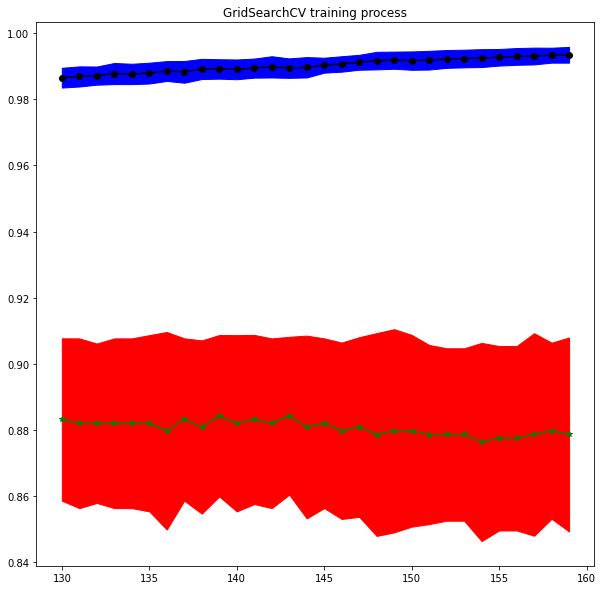

In [18]:
# Find the optimal parameters ： n_estimators
from sklearn.model_selection import GridSearchCV
from matplotlib import pyplot as plt

n_estimators = np.arange(130,160)
param = {'n_estimators': n_estimators}

learning_rate = np.arange(0.1, 1, 0.1)   # 0.3 is the best
param_test = {'learning_rate': learning_rate}

clf_gbt = GridSearchCV(GradientBoostingClassifier(), param_grid=param ,return_train_score=True, cv=10)
clf_gbt.fit(fea_train, target_train)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)

ax.fill_between(n_estimators,clf_gbt.cv_results_['mean_train_score']+clf_gbt.cv_results_['std_train_score'],
                 clf_gbt.cv_results_['mean_train_score']-clf_gbt.cv_results_['std_train_score'],color='b')
ax.fill_between(n_estimators,clf_gbt.cv_results_['mean_test_score']+clf_gbt.cv_results_['std_test_score'],
                 clf_gbt.cv_results_['mean_test_score']-clf_gbt.cv_results_['std_test_score'],color='r')

ax.plot(n_estimators,clf_gbt.cv_results_['mean_train_score'],'ko-')
ax.plot(n_estimators,clf_gbt.cv_results_['mean_test_score'],'g*-')

plt.title('GridSearchCV training process')
plt.show()

In [28]:
submission_test_pred = gbt.predict(submission)
submission_test_pred

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [49]:
new_id_col = new_testData['EmployeeNumber']
new_submission_df_2= pd.DataFrame({
                  "EmployeeNumber": new_id_col, 
                  "Attrition": new_submission_test_pred})
new_submission_df_2.groupby(by='Attrition').size()

new_submission_target_lst = []
for i in new_submission_df_2.Attrition:
    if i==1:
        new_submission_target_lst.append('No')
    elif i==0:
        new_submission_target_lst.append('Yes')


new_submission_df_2.loc[:,'Attrition'] = new_submission_target_lst

new_submission_df_2

,EmployeeNumber,Attrition
0,1,No
1,3,Yes
2,12,Yes
3,14,No
4,18,No
...,...,...
362,1437,Yes
363,1440,No
364,1441,No
365,1459,No


In [51]:
new_submission_df_2.to_csv('new_submission_3.csv', index=False)

# XGBoost

In [68]:
from xgboost.sklearn import XGBClassifier
xgb = XGBClassifier(n_estimators=21, learning_rate=0.4, max_depth = 4)
print(xgb.fit(re_fea_train,re_target_train))
print('训练集准确率:',xgb.score(re_fea_train,re_target_train))

train_pred = xgb.predict(re_fea_train)
Validation_pred = xgb.predict(fea_Validation)


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.4, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=4, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=21, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
训练集准确率: 0.986


In [69]:

print('Training set:')
print(classification_report(re_target_train, train_pred, digits = 6))
print('Validation set:')
print(classification_report(target_Validation, Validation_pred, digits = 6))

Training set:
              precision    recall  f1-score   support

           0   0.997271  0.974667  0.985840       750
           1   0.975228  0.997333  0.986157       750

    accuracy                       0.986000      1500
   macro avg   0.986250  0.986000  0.985998      1500
weighted avg   0.986250  0.986000  0.985998      1500

Validation set:
              precision    recall  f1-score   support

           0   0.571429  0.300000  0.393443        40
           1   0.860000  0.950276  0.902887       181

    accuracy                       0.832579       221
   macro avg   0.715714  0.625138  0.648165       221
weighted avg   0.807770  0.832579  0.810680       221



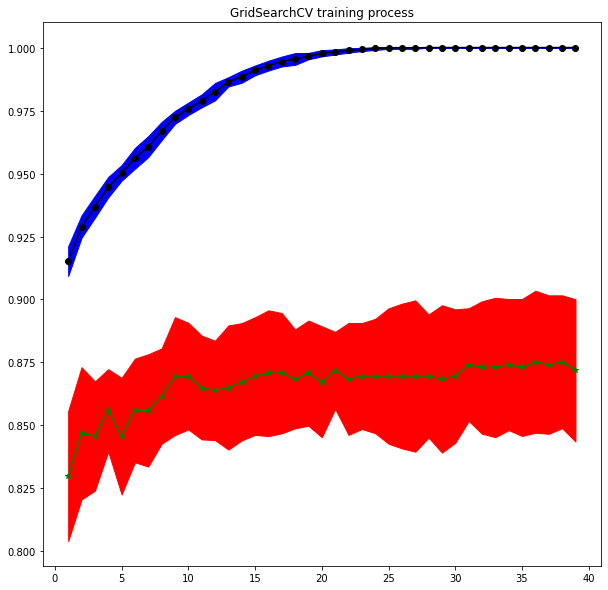

In [55]:
# Find the optimal parameters ： n_estimators
from sklearn.model_selection import GridSearchCV

n_estimators = np.arange(1,40) # 105
param = {'n_estimators': n_estimators}

learning_rate = np.arange(0.1, 1, 0.1)   # 0.4is the best
param_test = {'learning_rate': learning_rate}


max_depth = np.arange(1,11)
param_test_2 = {'max_depth': max_depth}

clf_gbt = GridSearchCV(XGBClassifier(), param_grid=param ,return_train_score=True, cv=10)
clf_gbt.fit(fea_train, target_train)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)

ax.fill_between(n_estimators,clf_gbt.cv_results_['mean_train_score']+clf_gbt.cv_results_['std_train_score'],
                 clf_gbt.cv_results_['mean_train_score']-clf_gbt.cv_results_['std_train_score'],color='b')
ax.fill_between(n_estimators,clf_gbt.cv_results_['mean_test_score']+clf_gbt.cv_results_['std_test_score'],
                 clf_gbt.cv_results_['mean_test_score']-clf_gbt.cv_results_['std_test_score'],color='r')

ax.plot(n_estimators,clf_gbt.cv_results_['mean_train_score'],'ko-')
ax.plot(n_estimators,clf_gbt.cv_results_['mean_test_score'],'g*-')

plt.title('GridSearchCV training process')
plt.show()

In [56]:
submission_test_pred = xgb.predict(submission)
new_id_col = new_testData['EmployeeNumber']
new_submission_df_3= pd.DataFrame({
                  "EmployeeNumber": new_id_col, 
                  "Attrition": new_submission_test_pred})
new_submission_df_3.groupby(by='Attrition').size()

new_submission_target_lst = []
for i in new_submission_df_3.Attrition:
    if i==1:
        new_submission_target_lst.append('No')
    elif i==0:
        new_submission_target_lst.append('Yes')


new_submission_df_3.loc[:,'Attrition'] = new_submission_target_lst
new_submission_df_3

,EmployeeNumber,Attrition
0,1,No
1,3,Yes
2,12,Yes
3,14,No
4,18,No
...,...,...
362,1437,Yes
363,1440,No
364,1441,No
365,1459,No


In [70]:
new_submission_df_2.to_csv('new_submission_4.csv', index=False)

# One-hot encoding in tree-based models only increases the depth of the tree, so it is advisable to consider using label encoding instead.

In [71]:
from sklearn import preprocessing

label=preprocessing.LabelEncoder()
cln_trainData['BusinessTravel']=label.fit_transform(cln_trainData['BusinessTravel'])

cln_trainData['Department']=label.fit_transform(cln_trainData['Department'])

cln_trainData['EducationField']=label.fit_transform(cln_trainData['EducationField'])

cln_trainData['Gender']=label.fit_transform(cln_trainData['Gender'])

cln_trainData['JobRole']=label.fit_transform(cln_trainData['JobRole'])

cln_trainData['MaritalStatus']=label.fit_transform(cln_trainData['MaritalStatus'])

cln_trainData['OverTime']=label.fit_transform(cln_trainData['OverTime'])


trainData_lable = cln_trainData.copy()
trainData_lable

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,OverTime,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,32,1,2,116,1,13,3,4,3,0,...,0,3,1,2,2,3,2,2,2,2
1,53,1,1,1436,2,6,2,2,2,1,...,1,4,1,13,3,1,7,7,4,5
2,39,1,1,613,1,6,1,3,4,1,...,0,1,1,9,5,3,7,7,1,7
3,34,1,1,971,2,1,3,5,4,1,...,1,4,0,10,3,3,10,9,8,6
4,50,1,2,333,1,22,5,3,3,1,...,1,4,0,32,2,3,32,6,13,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1098,34,1,1,511,2,3,2,1,4,0,...,0,1,0,6,3,3,2,2,2,2
1099,46,1,1,1277,2,2,3,1,3,1,...,1,2,1,13,5,2,10,6,0,3
1100,32,1,1,529,1,2,3,5,4,1,...,0,4,0,4,4,3,4,2,1,2
1101,39,1,0,105,1,9,3,1,4,1,...,0,3,0,21,3,2,6,0,1,3


In [90]:
from sklearn import preprocessing

testData_lable= testData.drop(columns=corr_Attrition_df.index.tolist())

label=preprocessing.LabelEncoder()

testData['BusinessTravel']=label.fit_transform(testData['BusinessTravel'])

testData['Department']=label.fit_transform(testData['Department'])

testData['EducationField']=label.fit_transform(testData['EducationField'])

testData['Gender']=label.fit_transform(testData['Gender'])

testData['JobRole']=label.fit_transform(testData['JobRole'])

testData['MaritalStatus']=label.fit_transform(testData['MaritalStatus'])

testData['OverTime']=label.fit_transform(testData['OverTime'])


testData_lable = cln_trainData.copy()
testData_lable

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,OverTime,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,32,1,2,116,1,13,3,4,3,0,...,0,3,1,2,2,3,2,2,2,2
1,53,1,1,1436,2,6,2,2,2,1,...,1,4,1,13,3,1,7,7,4,5
2,39,1,1,613,1,6,1,3,4,1,...,0,1,1,9,5,3,7,7,1,7
3,34,1,1,971,2,1,3,5,4,1,...,1,4,0,10,3,3,10,9,8,6
4,50,1,2,333,1,22,5,3,3,1,...,1,4,0,32,2,3,32,6,13,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1098,34,1,1,511,2,3,2,1,4,0,...,0,1,0,6,3,3,2,2,2,2
1099,46,1,1,1277,2,2,3,1,3,1,...,1,2,1,13,5,2,10,6,0,3
1100,32,1,1,529,1,2,3,5,4,1,...,0,4,0,4,4,3,4,2,1,2
1101,39,1,0,105,1,9,3,1,4,1,...,0,3,0,21,3,2,6,0,1,3


In [85]:
##分割训练、测试集
from sklearn.model_selection import train_test_split
fea_1 = trainData_lable.drop(['Attrition'], axis=1)
target_1 = trainData_lable['Attrition']
fea_train_1, fea_Validation_1, target_train_1, target_Validation_1 = train_test_split(fea_1, target_1, test_size=0.2, random_state=1) 
# random_state=0 表示每次分割后结果都不一样

In [86]:
from imblearn.over_sampling import SMOTE
from xgboost.sklearn import XGBClassifier
sm=SMOTE(random_state=0)

re_fea_train_1,re_target_train_1=sm.fit_resample(fea_train_1.values,target_train_1.values)

xgb_new = XGBClassifier(n_estimators=90, learning_rate=0.8, max_depth = 4)
print(xgb_new.fit(re_fea_train_1,re_target_train_1))
print('训练集准确率:',xgb_new.score(re_fea_train_1,re_target_train_1))

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.8, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=4, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=90, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
训练集准确率: 1.0


In [87]:
from sklearn.metrics import classification_report
train_pred = xgb_new.predict(re_fea_train_1)
Validation_pred = xgb_new.predict(fea_Validation_1)
print('Training set:')
print(classification_report(re_target_train_1, train_pred, digits = 6))
print('Validation set:')
print(classification_report(target_Validation_1, Validation_pred, digits = 6))

Training set:
              precision    recall  f1-score   support

           0   1.000000  1.000000  1.000000       750
           1   1.000000  1.000000  1.000000       750

    accuracy                       1.000000      1500
   macro avg   1.000000  1.000000  1.000000      1500
weighted avg   1.000000  1.000000  1.000000      1500

Validation set:
              precision    recall  f1-score   support

           0   0.593750  0.475000  0.527778        40
           1   0.888889  0.928177  0.908108       181

    accuracy                       0.846154       221
   macro avg   0.741319  0.701588  0.717943       221
weighted avg   0.835470  0.846154  0.839270       221



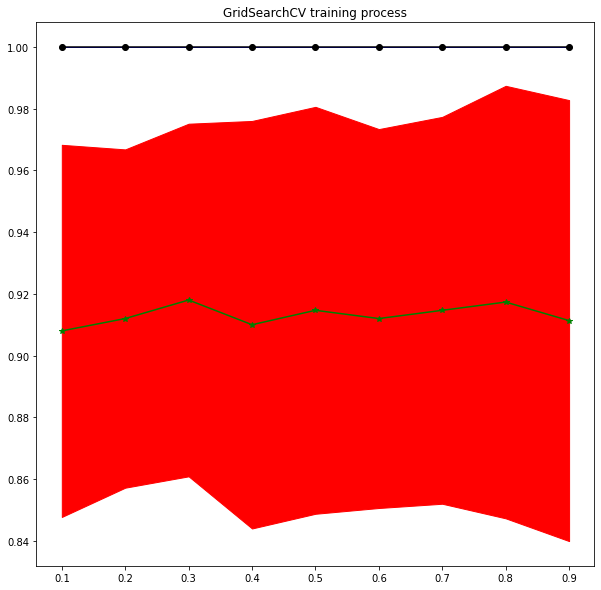

In [75]:
# Find the optimal parameters ： n_estimators
from sklearn.model_selection import GridSearchCV

n_estimators = np.arange(30,60) # 105
param = {'n_estimators': n_estimators}

learning_rate = np.arange(0.1, 1, 0.1)   # 0.4is the best
param_test = {'learning_rate': learning_rate}


max_depth = np.arange(1,11)
param_test_2 = {'max_depth': max_depth}

clf_xgb = GridSearchCV(XGBClassifier(), param_grid=param_test ,return_train_score=True, cv=10)
clf_xgb.fit(re_fea_train_1, re_target_train_1)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)

ax.fill_between(learning_rate,clf_xgb.cv_results_['mean_train_score']+clf_xgb.cv_results_['std_train_score'],
                 clf_xgb.cv_results_['mean_train_score']-clf_xgb.cv_results_['std_train_score'],color='b')
ax.fill_between(learning_rate,clf_xgb.cv_results_['mean_test_score']+clf_xgb.cv_results_['std_test_score'],
                 clf_xgb.cv_results_['mean_test_score']-clf_xgb.cv_results_['std_test_score'],color='r')

ax.plot(learning_rate,clf_xgb.cv_results_['mean_train_score'],'ko-')
ax.plot(learning_rate,clf_xgb.cv_results_['mean_test_score'],'g*-')

plt.title('GridSearchCV training process')
plt.show()

In [97]:

submission = testData_lable.drop(['Attrition'], axis=1).copy()
submission_test_pred = xgb_new.predict(submission)
testData_temp = pd.read_csv('/kaggle/input/int303-big-data-analysis-2223-S1/test.csv')
new_id_col = testData_temp ['EmployeeNumber']
new_submission_df_4= pd.DataFrame({
                  "EmployeeNumber": new_id_col, 
                  "Attrition": new_submission_test_pred})
new_submission_df_4.groupby(by='Attrition').size()

new_submission_target_lst = []
for i in new_submission_df_4.Attrition:
    if i==1:
        new_submission_target_lst.append('No')
    elif i==0:
        new_submission_target_lst.append('Yes')


new_submission_df_3.loc[:,'Attrition'] = new_submission_target_lst
new_submission_df_3

,EmployeeNumber,Attrition
0,1,No
1,3,Yes
2,12,Yes
3,14,No
4,18,No
...,...,...
362,1437,Yes
363,1440,No
364,1441,No
365,1459,No


In [98]:
new_submission_df_3.to_csv('new_submission_5.csv', index=False)